# Presprocessing Data

In [44]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [45]:
train_labels = []
train_samples = []

In [46]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint (65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint (65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [47]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

c:\users\aashish agarwal\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Create an artificial neural network with Keras

In [49]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [50]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Train and Build a Validation Set with Keras

In [52]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=1)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
1890/1890 [==============================] - 1s 402us/step - loss: 0.6847 - acc: 0.5138 - val_loss: 0.6717 - val_acc: 0.5476
Epoch 2/20
1890/1890 [==============================] - 1s 277us/step - loss: 0.6627 - acc: 0.6074 - val_loss: 0.6454 - val_acc: 0.6286
Epoch 3/20
1890/1890 [==============================] - 0s 177us/step - loss: 0.6401 - acc: 0.6333 - val_loss: 0.6188 - val_acc: 0.6571
Epoch 4/20
1890/1890 [==============================] - 0s 156us/step - loss: 0.6181 - acc: 0.6873 - val_loss: 0.5943 - val_acc: 0.7000
Epoch 5/20
1890/1890 [==============================] - 0s 170us/step - loss: 0.5976 - acc: 0.6995 - val_loss: 0.5694 - val_acc: 0.7524
Epoch 6/20
1890/1890 [==============================] - 0s 177us/step - loss: 0.5769 - acc: 0.7291 - val_loss: 0.5440 - val_acc: 0.7762
Epoch 7/20
1890/1890 [==============================] - 0s 169us/step - loss: 0.5559 - acc: 0.7497 - val_loss: 0.5183 - val_acc: 0.8238
E

# Presprocessing Test Data

In [54]:
test_labels = []
test_samples = []

In [55]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint (65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint (65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [56]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

c:\users\aashish agarwal\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict

In [58]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=1)

420/420 [==============================] - 0s 178us/step


In [59]:
for i in predictions:
    print(i)

[0.71835476 0.28164524]
[0.37717786 0.6228221 ]
[0.45462027 0.54537976]
[0.24221157 0.7577884 ]
[0.80465263 0.19534741]
[0.2888554 0.7111446]
[0.5737742  0.42622578]
[0.24221157 0.7577884 ]
[0.47448748 0.5255125 ]
[0.3227445  0.67725545]
[0.47448748 0.5255125 ]
[0.30553693 0.694463  ]
[0.80465263 0.19534741]
[0.11719301 0.882807  ]
[0.47448748 0.5255125 ]
[0.14434743 0.8556526 ]
[0.80620545 0.19379452]
[0.14434743 0.8556526 ]
[0.80465263 0.19534741]
[0.09458215 0.90541786]
[0.51440185 0.48559818]
[0.09458215 0.90541786]
[0.7993423  0.20065777]
[0.07595841 0.9240416 ]
[0.7993423  0.20065777]
[0.09458215 0.90541786]
[0.8049714  0.19502854]
[0.04640372 0.95359623]
[0.8003462 0.1996538]
[0.22785309 0.7721468 ]
[0.80465263 0.19534741]
[0.05644584 0.94355416]
[0.80134636 0.19865364]
[0.2888554 0.7111446]
[0.8059749  0.19402504]
[0.37717786 0.6228221 ]
[0.80465263 0.19534741]
[0.06547726 0.93452275]
[0.7495244 0.2504756]
[0.09458215 0.90541786]
[0.80465263 0.19534741]
[0.2888554 0.7111446]
[0

In [60]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=1)

420/420 [==============================] - 0s 53us/step


In [61]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confusion Matrix

In [62]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [63]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[181  29]
 [  6 204]]


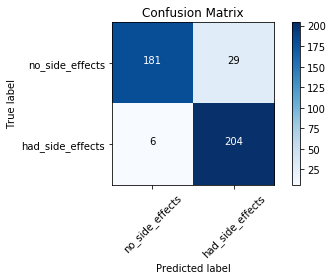

In [65]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Save and load a Keras model

# 1. model.save()

In [66]:
model.save('medical_trial_model.h5')

In [67]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [68]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [69]:
new_model.get_weights()

[array([[-0.38507563,  0.38218525, -0.31848714,  0.2009771 , -0.4546733 ,
          0.6298514 , -0.27689672, -0.39751726, -0.35384178,  0.5364153 ,
         -0.4136425 , -0.12078246,  0.5368879 , -0.16405442,  0.24319415,
          0.32845917]], dtype=float32),
 array([ 0.        , -0.12456232,  0.        , -0.07221439,  0.        ,
        -0.13108389,  0.        ,  0.        ,  0.        , -0.04595751,
         0.        ,  0.        , -0.10714052,  0.        , -0.08634568,
        -0.04201454], dtype=float32),
 array([[-1.54974714e-01,  1.97322965e-02, -6.79905415e-02,
         -1.03048444e-01, -1.66398704e-01, -2.31030896e-01,
         -2.79425174e-01,  1.70067400e-01, -2.75934994e-01,
          1.10239387e-01, -1.12045377e-01, -1.98135868e-01,
         -2.02944487e-01, -1.99999273e-01, -1.38771534e-03,
          1.12344623e-01, -2.72290468e-01, -3.24677140e-01,
          1.71187669e-01,  2.33022243e-01,  1.43700689e-01,
         -7.47595727e-02,  2.83534318e-01, -2.12027982e-01,
 

# 2. model.to_json()

In [70]:
json_string = model.to_json()

In [71]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_14", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer"

In [78]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [79]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# 3. model.save_weights()

In [80]:
model.save_weights('my_model_weights.h5')

In [81]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [82]:
model2.load_weights('my_model_weights.h5')